In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8


In [6]:
df = pd.read_csv("customer_churn.csv")

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [9]:
customer_15 = df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [18]:
senior_male_electronic = df[(df["PaymentMethod"]=='Electronic check') & (df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) ]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


In [19]:
customer_total_tenure = df[(df.tenure >70) | (df.MonthlyCharges>100)]
customer_total_tenure 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [8]:
two_mail_yes = df.loc[(df.Contract == 'Two year') & (df.PaymentMethod == 'Mailed check') & (df.Churn == 'Yes')] 
two_mail_ye.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
customer_333 = df.sample(n=333,replace = True) 
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
734,1173-NOEYG,Female,0,Yes,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),90.15,2423.4,No
4437,3716-LRGXK,Male,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),101.15,6067.4,No
971,5002-GCQFH,Male,0,Yes,No,49,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.85,4733.1,No
3306,9643-AVVWI,Female,0,Yes,Yes,3,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,80.00,241.3,No
6042,4750-UKWJK,Female,1,Yes,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,727.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,9087-EYCPR,Female,0,No,No,60,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.00,1505.05,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
5631,6542-LWGXJ,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No
3563,6741-EGCBI,Male,1,No,No,30,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.50,2595.85,No


g.Get the count of different levels from the 'Churn' column

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

a.Build a bar-plot for the 'InternetService'Column 
i.Set x-axis label to 'Categories of Internet Services' 
ii. Set y-axis label to 'Count of Categories' 
iii. Set the title of plot to be 'Distribution of Internet Services' 
iv. Set the color of the bars to be orange 

In [13]:
x = df['InternetService'].value_counts().keys().tolist()

In [14]:
x

['Fiber optic', 'DSL', 'No']

In [15]:
y = df['InternetService'].value_counts().values.tolist()

In [16]:
y

[3096, 2421, 1526]

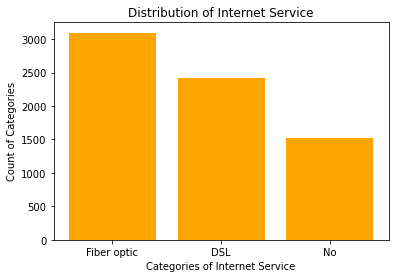

In [19]:
plt.bar(x,y,color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

b. Build a histogram for the 'tenure' column: 
i. Set the number of bins to be 30 
ii. Set the color of the bins to be 'green' 
iii.Assign the title 'Distribution of tenure'

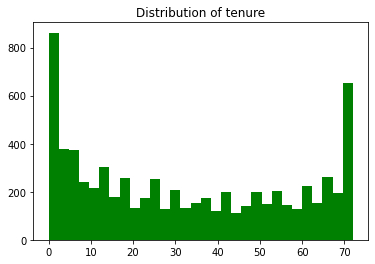

In [20]:
plt.hist(df["tenure"],bins=30,color="green") 
plt.title("Distribution of tenure")
plt.show()

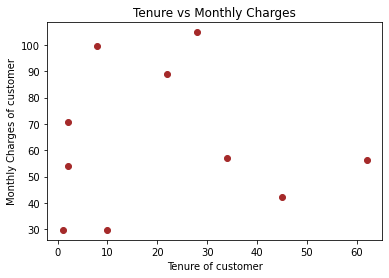

In [7]:
x = df['tenure'].head(10) 
y = df['MonthlyCharges'].head(10) 
plt.scatter(x,y,color='brown') 
plt.xlabel("Tenure of customer") 
plt.ylabel("Monthly Charges of customer") 
plt.title("Tenure vs Monthly Charges") 
plt.show()

/Users/snehabanda/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


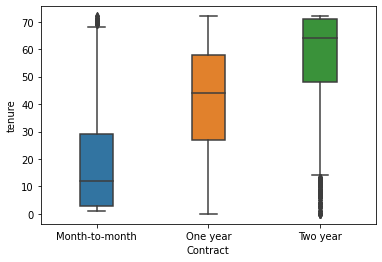

In [8]:
sns.boxplot(df.Contract,df.tenure,width=0.3)
plt.show()

In [18]:
X = pd.DataFrame(df['tenure']) 
Y = pd.DataFrame(df['MonthlyCharges']) 
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression 

linear = LinearRegression()

linear.fit(X_train, Y_train)

LinearRegression()

In [20]:
y_pred = linear.predict(X_test)

In [21]:
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [17]:
from sklearn.metrics import r2_score 

r2_score(Y_test, y_pred)

0.07187050310498821

Root mean square error (RMSE) is a method of measuring the difference between values predicted by a model and their actual values.

In [25]:
error =mean_squared_error(Y_test, y_pred) 
error

864.0415701364655

In [26]:
rmse = np.sqrt(error) 
rmse 

29.394584027273893

In [43]:
X = pd.DataFrame(df['MonthlyCharges'])
Y = pd.DataFrame(df['Churn'])

In [44]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.35, random_state = 0)

In [45]:
log_reg = LogisticRegression() 
log_reg.fit(X_train, Y_train)

/Users/snehabanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
y_pred = log_reg.predict(X_test)

In [49]:
cm = confusion_matrix(y_pred,Y_test)
cm

array([[1815,  651],
       [   0,    0]])

In [47]:
accuracy_score(Y_test,y_pred)

0.7360097323600974

In [ ]:
x = pd.DataFram(df.loc[:,['MonthlyCharges','tenure']])
y = df['Churn']

In [57]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [62]:
mult_log_reg = LogisticRegression() 


In [63]:
mult_log_reg.fit(X_train,Y_train)

/Users/snehabanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
y_pred = mult_log_reg.predict(X_test)

In [67]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [68]:
cm = confusion_matrix(y_pred,Y_test) 
cm

array([[1041,  368],
       [   0,    0]])

In [71]:
score=accuracy_score(y_pred,Y_test)
score

0.7388218594748048

In [ ]:
x = pd.DataFrame(df['tenure']) 
y = df['Churn']

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [76]:
decisionTreeClassifier = DecisionTreeClassifier()


In [77]:
decisionTreeClassifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = decisionTreeClassifier.predict(x_test)

In [79]:
cm = confusion_matrix(y_pred,Y_test) 
cm

array([[1041,  368],
       [   0,    0]])

In [81]:
score = accuracy_score(y_pred,Y_test) 
score

0.7388218594748048

In [ ]:
x = pd.DataFram(df.loc[:,['MonthlyCharges','tenure']])
y = df['Churn']

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 0)

In [82]:
model = RandomForestClassifier(n_estimators =100) 
model

RandomForestClassifier()

In [83]:
model.fit(X_train,Y_train)

/var/folders/zp/m0qtjlrn2zbbycmnfbd73pch0000gn/T/ipykernel_17773/4153405994.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [85]:
cm= confusion_matrix(Y_test,y_pred) 
cm

array([[1041,    0],
       [ 368,    0]])